In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import date
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [11]:
counties = pd.read_csv('Population Estimates by County.csv', error_bad_lines=False)
counties['County'] = counties.County.str.replace('County ?' , '')
counties['Population'] = counties.Population.str.replace(',?' , '')
counties['Population'] = counties['Population'].astype('int64')
counties['County'] = counties['County'].str.strip(' ')

In [12]:
url = "https://data.ca.gov/dataset/529ac907-6ba1-4cb7-9aae-8966fc96aeef/resource/42d33765-20fd-44b8-a978-b083b7542225/download/hospitals_by_county.csv"
df = pd.read_csv(url)
pd.set_option("display.max_rows", None, "display.max_column", None, 'display.width', 1000)
date = "2020-12-02"

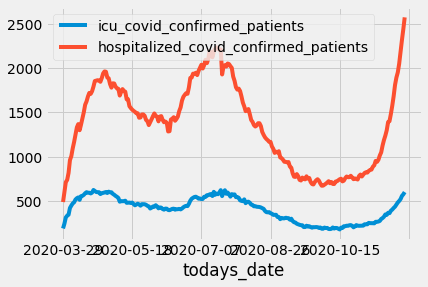

In [13]:
LA_data = df.where(df['county'] == 'Los Angeles').dropna(thresh = 2)
LA_data.plot.line(x = 'todays_date', y = ["icu_covid_confirmed_patients", "hospitalized_covid_confirmed_patients"])

In [14]:
today = df[df.todays_date == date]
today = today[['county', 'icu_covid_confirmed_patients', 'icu_suspected_covid_patients', 'icu_available_beds']]
today['percentage_of_icu_beds_filled_by_covid'] = round(((today.icu_covid_confirmed_patients + today.icu_suspected_covid_patients) / today.icu_available_beds), 4) * 100
today.sort_values(by = ['county'], inplace = True, ascending = True)
today.reset_index(inplace=True, drop=True)

In [15]:
yesterday = df[df.todays_date == '2020-12-01']
yesterday = yesterday[['county', 'icu_covid_confirmed_patients', 'icu_suspected_covid_patients', 'icu_available_beds']]
yesterday['percentage_of_icu_beds_filled_by_covid'] = round(((yesterday.icu_covid_confirmed_patients + yesterday.icu_suspected_covid_patients) / yesterday.icu_available_beds), 4) * 100
yesterday.sort_values(by = ['county'], inplace = True, ascending = True)
yesterday.reset_index(inplace=True, drop=True)

In [16]:
covid_pop_today = today.set_index('county').join(counties.set_index('County'))
covid_pop_yesterday = yesterday.set_index('county').join(counties.set_index('County'))

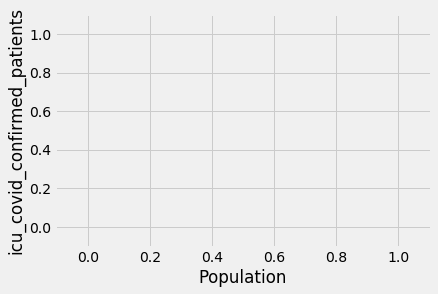

In [17]:
pop_above_100000_today = covid_pop_today.where(covid_pop_today['Population'] > 100000).dropna(thresh = 2)
pop_above_100000_yesterday = covid_pop_yesterday.where(covid_pop_yesterday['Population'] > 100000).dropna(thresh = 2)

# pop_above_100000.plot.scatter(x = 'Population', y = 'icu_covid_confirmed_patients')
sns.regplot(pop_above_100000_today['Population'], pop_above_100000_today['icu_covid_confirmed_patients'])
# sns.regplot(pop_above_100000_yesterday['Population'], pop_above_100000_yesterday['icu_covid_confirmed_patients'])

In [18]:
pop_above_100000_today

,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,percentage_of_icu_beds_filled_by_covid,Population
county,,,,,
